In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YoutubeLI/master/dataset/nyc_energy_consumption.csv')

In [ ]:
df.head(5)

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [ ]:
fig = px.line(df, x='timeStamp', y='demand', title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
df_temp = df.set_index('timeStamp')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f690a2e7690>,
      dtype=object)

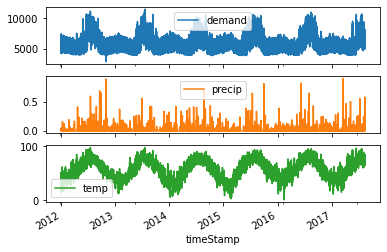

In [ ]:
df_temp.plot(subplots=True)

In [ ]:
df.query("demand != demand")

,timeStamp,demand,precip,temp
49124,2012-03-11 02:00:00,NaN,0.0000,37.78
49125,2013-03-10 02:00:00,NaN,0.0000,38.18
49126,2014-03-09 02:00:00,NaN,0.0000,40.86
49127,2015-03-08 02:00:00,NaN,0.0000,36.96
49128,2015-03-11 11:00:00,NaN,0.0000,49.95
...,...,...,...,...
49200,2017-08-12 02:00:00,NaN,0.0000,70.84
49201,2017-08-12 03:00:00,NaN,0.0000,70.57
49202,2017-08-12 04:00:00,NaN,0.0000,69.89
49203,2017-08-12 05:00:00,NaN,0.0000,68.59


In [ ]:
df["demand"]=df["demand"].fillna(method="ffill")
df["temp"]=df["temp"].fillna(method="ffill")

In [ ]:
df_temp = df.set_index('timeStamp')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6909dff910>,
      dtype=object)

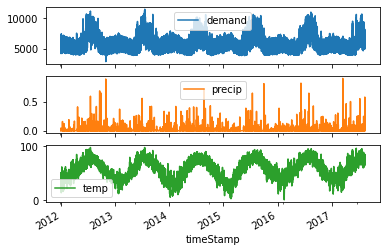

In [ ]:
df_temp.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6907b79910>,
      dtype=object)

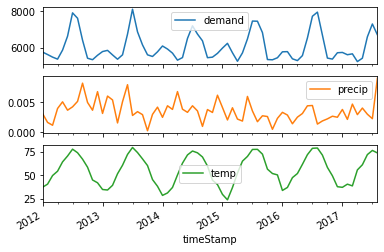

In [ ]:
df_temp.resample('M').mean().plot(subplots=True)

In [ ]:
df_monthly = df_temp.resample('M').mean()

In [ ]:
# !pip uninstall numpy
# !pip install numpy
# !pip uninstall pmdarima
# !pip install pmdarima


In [ ]:
import pmdarima as pm

model = pm.auto_arima(df_monthly["demand"],
                    m=12, seasonal=True,
                    start_p=0, start_q=0,
                    max_order=4, test='adf', error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1100.321, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1023.743, Time=0.52 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.758, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.516, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1023.005, Time=1.35 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=1036.608, Time=1.79 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1097.636, Time=0.72 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1014.000, Time=1.71 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1014.047, Time=0.68 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(3,0,0)(2,0,0)[12] intercept   : AIC=101

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   68
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                -494.430
Date:                             Mon, 19 Apr 2021   AIC                            998.861
Time:                                     04:26:15   BIC                           1009.958
Sample:                                          0   HQIC                          1003.258
                                              - 68                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2597.7991    586.391      4.430      0.000    1448.494    3747.104
ar.L1         -0.1326      0.196     -0.677      0.498      -0.517       0.251
ma.L1          0.7799      0.160      4.862      0.000       0.465       1.094
ar.S.L12       0.6234      0.083      7.554      0.000       0.462       0.785
sigma2      1.097e+05   2.34e+04      4.693      0.000    6.39e+04    1.56e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.10   Jarque-Bera (JB):                15.08
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.97
Prob(H) (two-sided):                  0.32   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train=df_monthly[(df_monthly.index.get_level_values(0) >= '2012-01-31') & (df_monthly.index.get_level_values(0) <= '2017-04-30')]
test=df_monthly[(df_monthly.index.get_level_values(0) > '2017-04-30')]


In [ ]:
test

,demand,precip,temp
timeStamp,,,
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625
2017-07-31,7306.861511,0.002272,76.380363
2017-08-31,6711.707542,0.008961,73.730258


In [ ]:
model.fit(train['demand'])

ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(1, 0, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
forecast=model.predict(n_periods=4, return_conf_int=True)

In [ ]:
forecast

(array([6778.3991397 , 7750.40527669, 8946.26420283, 9174.63898263]),
 array([[ 5930.07784718,  7626.72043223],
        [ 6902.08397432,  8598.72657906],
        [ 8097.94289065,  9794.58551501],
        [ 8326.31766067, 10022.96030459]]))

In [ ]:
forecast_df=pd.DataFrame(forecast[0], index=test.index, columns=["Prediction"])

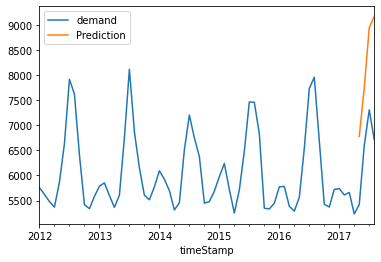

In [ ]:
pd.concat([df_monthly["demand"], forecast_df], axis=1).plot()

In [ ]:
forecast1=model.predict(n_periods=8, return_conf_int=True)

In [ ]:
forecast_range=pd.date_range(start='2017-05-31', periods=8, freq='M')


In [ ]:
forecast1_df=pd.DataFrame(forecast1[0], index=forecast_range, columns=["Prediction"])

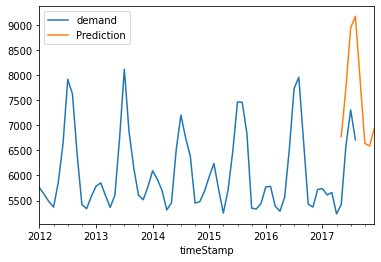

In [ ]:
pd.concat([df_monthly["demand"], forecast1_df], axis=1).plot()

In [ ]:
lower=pd.Series(forecast1[1][:,0], index=forecast_range)
upper=pd.Series(forecast1[1][:,1], index=forecast_range)

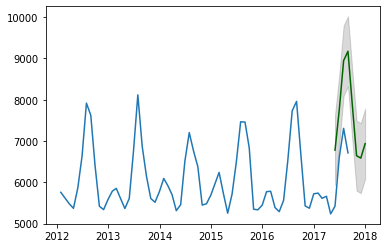

In [ ]:
plt.plot(df_monthly["demand"])
plt.plot(forecast1_df, color="darkgreen")
plt.fill_between(forecast_range,
                 lower,
                 upper,
                 color='k', alpha=.15)

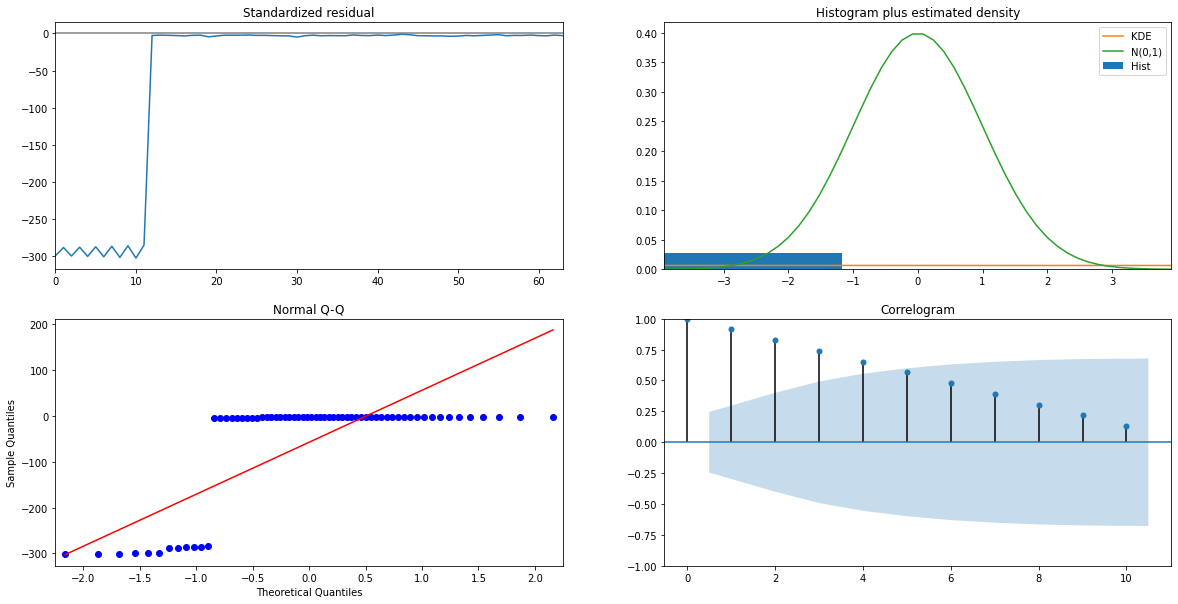

In [ ]:
mpl.rcParams['figure.figsize'] = (20,10)
mpl.rcParams['axes.grid'] = False
out=model.plot_diagnostics()

## FB Prophet

y(t) = g(t) + s(t) + h(t) + et

*   g: trend
*   s: seasonality
*   h: holiday
*   e: Noise

In [ ]:
from fbprophet import Prophet

In [ ]:
df_daily = df_temp.resample('D').mean()

In [ ]:
df_final = df_daily.reset_index()[['timeStamp', 'demand']].rename({'timeStamp': 'ds', 'demand':'y'}, axis='columns')

In [ ]:
df_final

,ds,y
0,2012-01-01,4954.833333
1,2012-01-02,5302.954167
2,2012-01-03,6095.512500
3,2012-01-04,6336.266667
4,2012-01-05,6130.245833
...,...,...
2046,2017-08-08,6471.626042
2047,2017-08-09,6811.112167
2048,2017-08-10,5546.586500
2049,2017-08-11,5534.683000


In [ ]:
train=df_final[(df_final['ds'] >= '2012-01-31') & (df_final['ds'] <= '2017-04-30')]
test=df_final[(df_final['ds'] > '2017-04-30')]


In [ ]:
model_fbp = Prophet(interval_width=0.95, yearly_seasonality=True)

In [ ]:
model_fbp.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model_fbp.params

{'beta': array([[-0.03466656, -0.07039006,  0.05766924,  0.04706038, -0.01401947,
         -0.00491803, -0.00376479, -0.00074901,  0.00244512, -0.00761038,
          0.00411864,  0.00476616, -0.00794669, -0.00481678,  0.00697904,
         -0.00273233, -0.00143593,  0.00162631,  0.00022861, -0.00019963,
         -0.028281  ,  0.02382176,  0.0206688 ,  0.00052902, -0.00497191,
         -0.00507462]]),
 'delta': array([[ 6.25400175e-08, -1.60344690e-02, -4.73873739e-02,
          4.53479291e-10, -2.21096494e-08, -6.49081567e-09,
         -1.21030957e-07,  2.79780452e-08, -3.93473775e-08,
         -2.16214497e-07, -6.81227662e-02, -3.12459419e-02,
         -1.35797359e-08,  2.48969672e-02,  1.98655871e-01,
          1.19808463e-07, -7.72560221e-03, -8.02146615e-02,
         -3.02971916e-02,  4.78274898e-08,  7.95894193e-09,
         -6.77549455e-09,  4.53795611e-03,  1.29713020e-04,
         -3.55328006e-08]]),
 'k': array([[0.05409584]]),
 'm': array([[0.59664812]]),
 'sigma_obs': array([

In [ ]:
future = model_fbp.make_future_dataframe(periods=104)
future.tail()

,ds
2016,2017-08-08
2017,2017-08-09
2018,2017-08-10
2019,2017-08-11
2020,2017-08-12


In [ ]:
forecast=model_fbp.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2016,2017-08-08,7583.945092,6724.623373,8520.145844
2017,2017-08-09,7573.257366,6653.742456,8508.585077
2018,2017-08-10,7526.526492,6675.281120,8500.499145
2019,2017-08-11,7483.474815,6504.605187,8444.122237
2020,2017-08-12,6907.685480,5975.839122,7817.802048


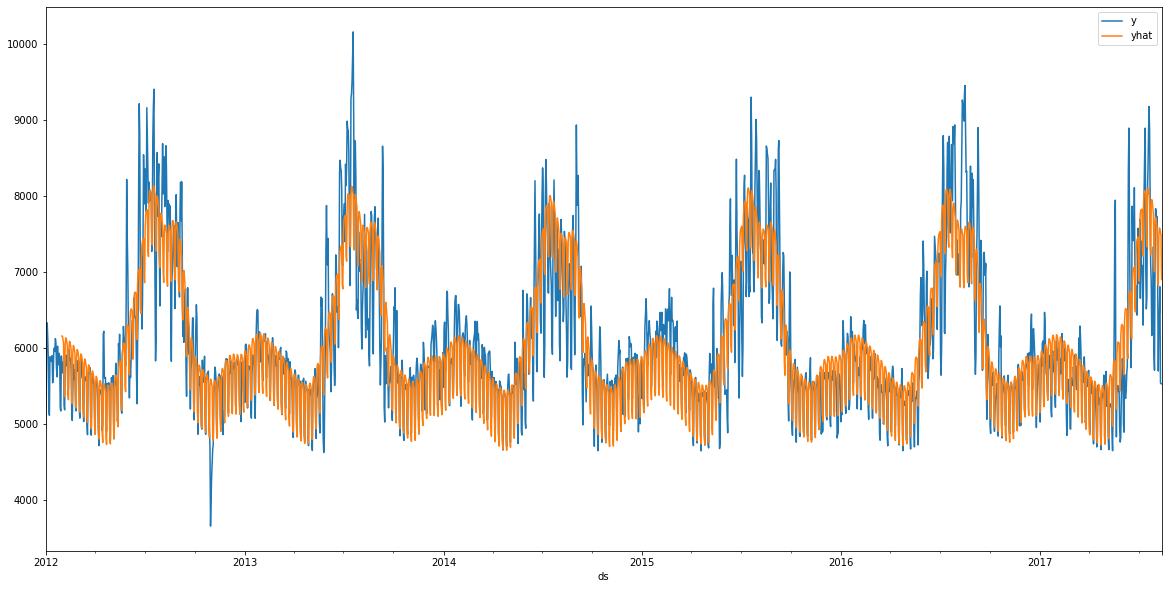

In [ ]:
pd.concat([df_final.set_index('ds')['y'], forecast.set_index('ds')['yhat']], axis=1).plot()

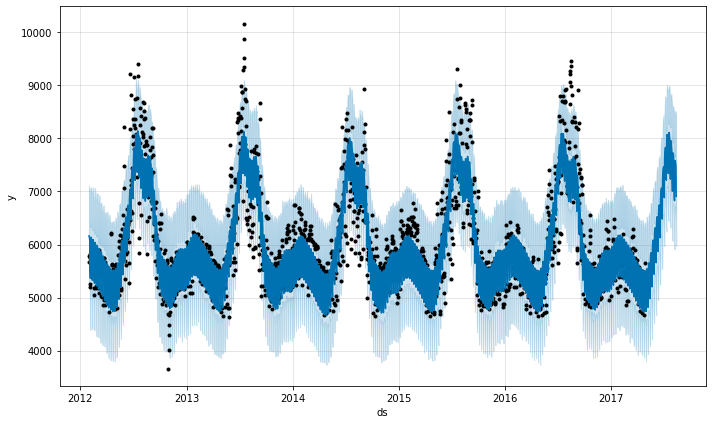

In [ ]:
fig1 = model_fbp.plot(forecast)

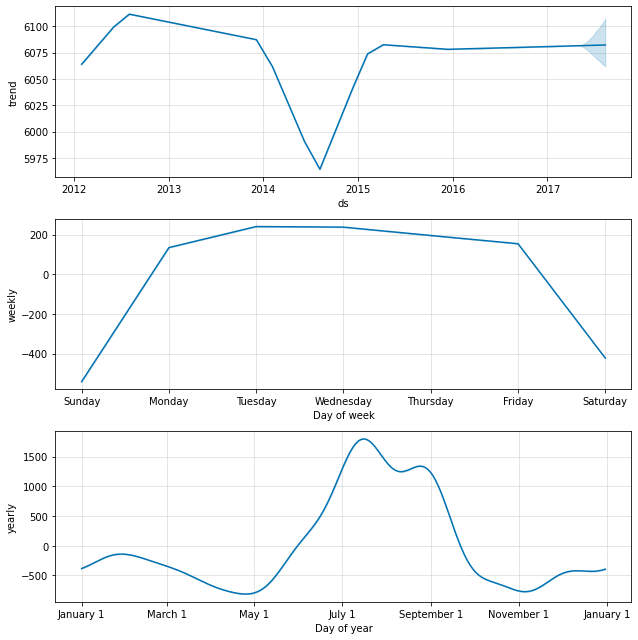

In [ ]:
fig2 = model_fbp.plot_components(forecast)

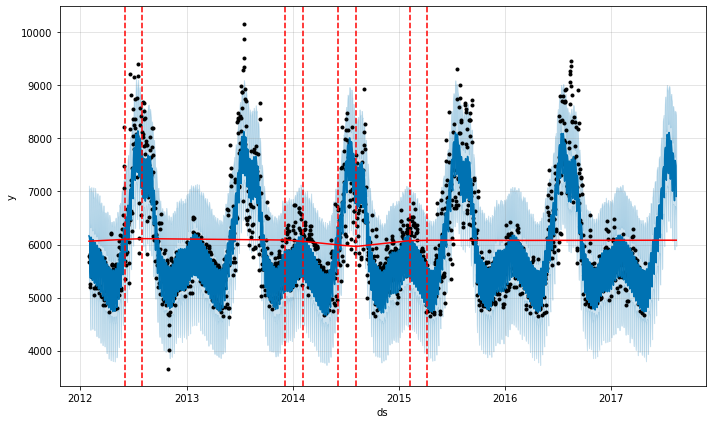

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = model_fbp.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_fbp, forecast)


In [ ]:
deltas = model_fbp.params["delta"].mean(0)
deltas

array([ 6.25400175e-08, -1.60344690e-02, -4.73873739e-02,  4.53479291e-10,
       -2.21096494e-08, -6.49081567e-09, -1.21030957e-07,  2.79780452e-08,
       -3.93473775e-08, -2.16214497e-07, -6.81227662e-02, -3.12459419e-02,
       -1.35797359e-08,  2.48969672e-02,  1.98655871e-01,  1.19808463e-07,
       -7.72560221e-03, -8.02146615e-02, -3.02971916e-02,  4.78274898e-08,
        7.95894193e-09, -6.77549455e-09,  4.53795611e-03,  1.29713020e-04,
       -3.55328006e-08])

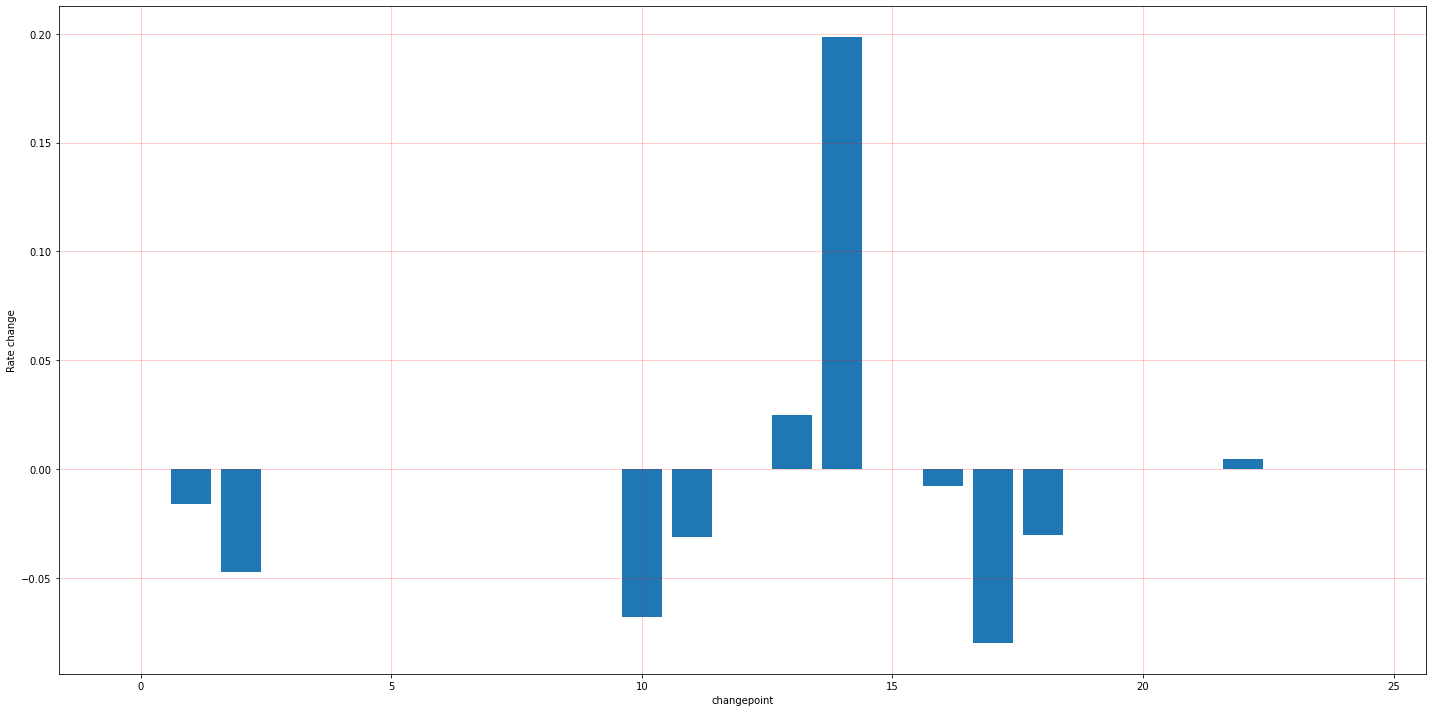

In [ ]:
fig = plt.figure(facecolor='w')
ax=fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which="major", c="red", ls="-", lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('changepoint')
fig.tight_layout()

In [ ]:
model_fbp.changepoints

61     2012-04-01
123    2012-06-02
184    2012-08-02
245    2012-10-02
306    2012-12-02
368    2013-02-02
429    2013-04-04
490    2013-06-04
552    2013-08-05
613    2013-10-05
674    2013-12-05
735    2014-02-04
797    2014-04-07
858    2014-06-07
919    2014-08-07
980    2014-10-07
1042   2014-12-08
1103   2015-02-07
1164   2015-04-09
1226   2015-06-10
1287   2015-08-10
1348   2015-10-10
1409   2015-12-10
1471   2016-02-10
1532   2016-04-11
Name: ds, dtype: datetime64[ns]

In [ ]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(model_fbp, forecast)
py.iplot(fig)

In [ ]:
from fbprophet.diagnostics import cross_validation

cv_results = cross_validation(model=model_fbp, initial='731 days', horizon="365 days")

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


In [ ]:
cv_results.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-05-02,5568.050613,4802.614122,6437.284629,5460.325000,2014-05-01
1,2014-05-03,4974.976730,4090.561984,5893.783416,4893.683333,2014-05-01
2,2014-05-04,4850.059337,3967.242016,5686.412928,4764.137500,2014-05-01
3,2014-05-05,5536.977174,4761.231560,6377.100265,5406.762500,2014-05-01
4,2014-05-06,5629.195281,4765.471916,6461.090357,5409.750000,2014-05-01


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,251827.102343,501.823776,405.150032,0.072830,0.063863,0.901099
1,37 days 00:00:00,258545.281929,508.473482,412.600101,0.074129,0.064329,0.895604
2,37 days 12:00:00,260796.120327,510.682015,415.864284,0.074689,0.064713,0.895604
3,38 days 00:00:00,262492.188172,512.339915,418.125499,0.074838,0.065111,0.895604
4,38 days 12:00:00,266064.577586,515.814480,423.218719,0.075649,0.065766,0.895604
...,...,...,...,...,...,...,...
653,363 days 00:00:00,262460.198411,512.308694,448.054886,0.082676,0.082025,0.983516
654,363 days 12:00:00,264024.711668,513.833350,448.806045,0.082808,0.082654,0.983516
655,364 days 00:00:00,268215.738438,517.895490,452.188138,0.083627,0.083961,0.983516
656,364 days 12:00:00,268146.078605,517.828233,451.561766,0.083545,0.083961,0.983516


## Multi-variate Time Series using Fbprophet

In [ ]:
df_daily = df_temp.resample('D').mean()

In [ ]:
df_final = df_daily.reset_index()[['timeStamp', 'demand', 'temp']].rename({'timeStamp': 'ds', 'demand':'y', 'temp':'temp'}, axis='columns')

In [ ]:
df_final['temp'] = df_final['temp'].fillna(method='ffill')

In [ ]:
df_final['month'] = df_final['ds'].dt.month

In [ ]:
def summer_temp(temp):
  if temp > 80:
    return 1
  else:
    return 0

In [ ]:
df_final['summer_temp'] = df_final['temp'].apply(summer_temp)

In [ ]:
df_final['month_bins'] = pd.cut(df_final['month'], bins=3, labels=False)

In [ ]:
train = df_final[(df_final['ds'] >= '2012-01-01') & (df_final['ds'] <= '2017-04-30')]
test = df_final[df_final['ds'] < '2017-04-30']

In [ ]:
model_fbp_mv = Prophet(interval_width=0.95, yearly_seasonality=True)

model_fbp_mv.add_regressor('summer_temp', standardize=False)
model_fbp_mv.add_regressor('month_bins', standardize=False, mode='multiplicative')


In [ ]:
model_fbp_mv.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model_fbp_mv.params

{'beta': array([[-0.03567994, -0.05904744,  0.04935985,  0.04007138, -0.00953321,
         -0.00173509, -0.00782091, -0.00254145,  0.00332756, -0.00586158,
          0.00144698,  0.00307278, -0.00530896, -0.00381955,  0.003378  ,
         -0.00274308,  0.00067475,  0.00141773, -0.0013242 , -0.00030659,
         -0.02714941,  0.02415011,  0.0202344 ,  0.00152279, -0.00495135,
         -0.00521731,  0.13432807, -0.00950333]]),
 'delta': array([[-2.40130015e-08, -1.51499928e-05, -1.79984009e-01,
         -1.29299259e-07,  2.52676128e-08,  7.85180350e-03,
          1.21313336e-02,  5.49822900e-03,  2.21135064e-07,
         -1.29128872e-07, -3.05409236e-07, -4.20890990e-02,
         -1.51296798e-06,  6.34260472e-08,  1.40006000e-01,
         -1.23633359e-07, -6.44742731e-09, -9.57665967e-02,
         -4.56529549e-02, -2.99039376e-08,  2.92184966e-07,
          5.44931379e-08,  3.38017513e-02,  3.26013279e-02,
         -1.14555488e-08]]),
 'k': array([[0.14516522]]),
 'm': array([[0.58914008

In [ ]:
future = model_fbp_mv.make_future_dataframe(periods=104)
future.tail()

,ds
2046,2017-08-08
2047,2017-08-09
2048,2017-08-10
2049,2017-08-11
2050,2017-08-12


In [ ]:
future['summer_temp'] = df_final['summer_temp']
future['month_bins'] = df_final['month_bins']

In [ ]:
future.tail()

,ds,summer_temp,month_bins
2046,2017-08-08,0,1
2047,2017-08-09,0,1
2048,2017-08-10,0,1
2049,2017-08-11,0,1
2050,2017-08-12,0,1


In [ ]:
forecast = model_fbp_mv.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2046,2017-08-08,7379.875518,6631.840881,8164.768274
2047,2017-08-09,7391.556059,6699.160490,8217.456055
2048,2017-08-10,7361.354656,6598.113484,8144.030799
2049,2017-08-11,7311.918933,6472.508290,8091.373808
2050,2017-08-12,6731.087506,6006.416388,7493.064550


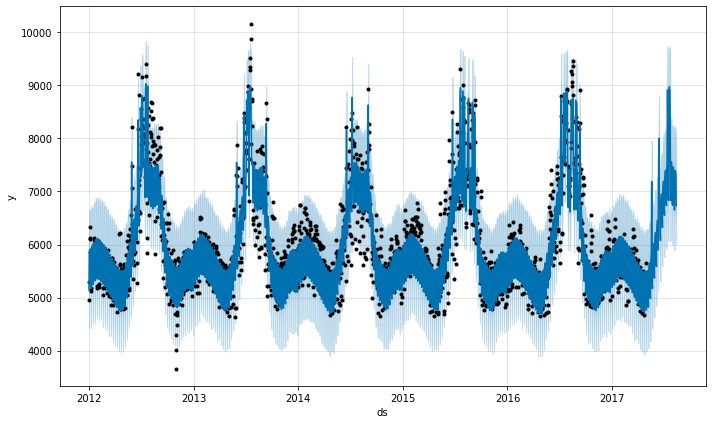

In [ ]:
fig1 = model_fbp_mv.plot(forecast)

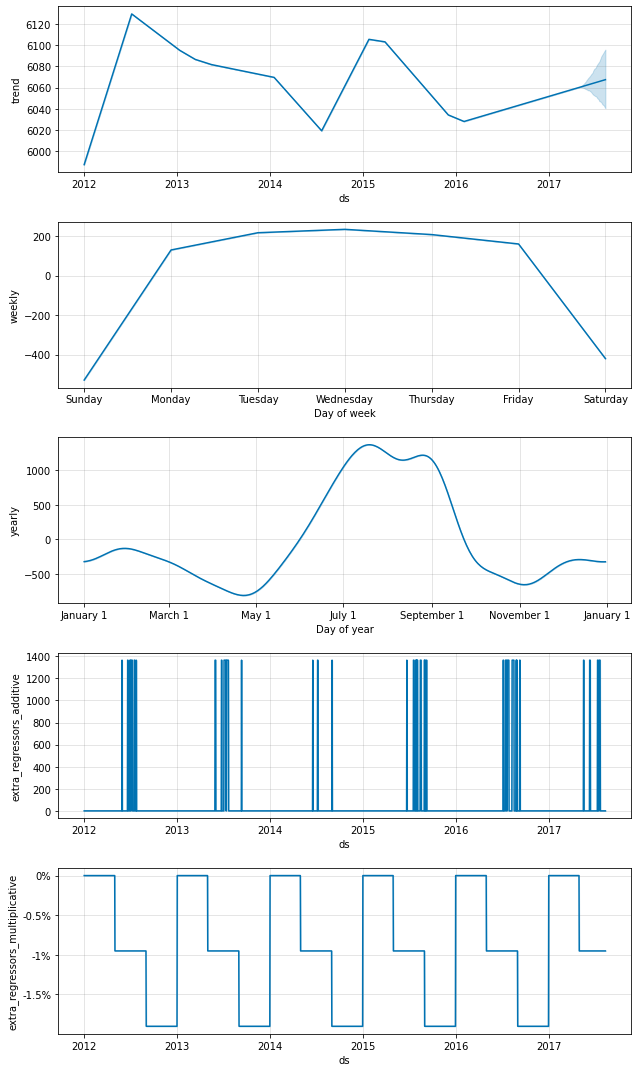

In [ ]:
fig2 = model_fbp_mv.plot_components(forecast)

In [ ]:
from fbprophet.diagnostics import cross_validation, performance_metrics


cv_results = cross_validation(model=model_fbp_mv, initial='731 days', horizon='365 days')
df_p = performance_metrics(cv_results)

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


In [ ]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,200708.267749,448.004763,348.529983,0.061768,0.051746,0.890110
1,37 days 00:00:00,206705.048271,454.648269,355.338414,0.062913,0.052009,0.884615
2,37 days 12:00:00,207946.531183,456.011547,357.677872,0.063307,0.053054,0.884615
3,38 days 00:00:00,210759.376684,459.085370,361.060233,0.063639,0.054172,0.879121
4,38 days 12:00:00,212953.324486,461.468660,364.933728,0.064256,0.054532,0.879121
...,...,...,...,...,...,...,...
653,363 days 00:00:00,146122.763851,382.260074,319.082311,0.058330,0.057087,0.978022
654,363 days 12:00:00,146710.029207,383.027452,319.129966,0.058337,0.057087,0.978022
655,364 days 00:00:00,149352.487451,386.461495,321.416919,0.058964,0.058355,0.972527
656,364 days 12:00:00,148987.490561,385.988977,320.589179,0.058835,0.057572,0.972527


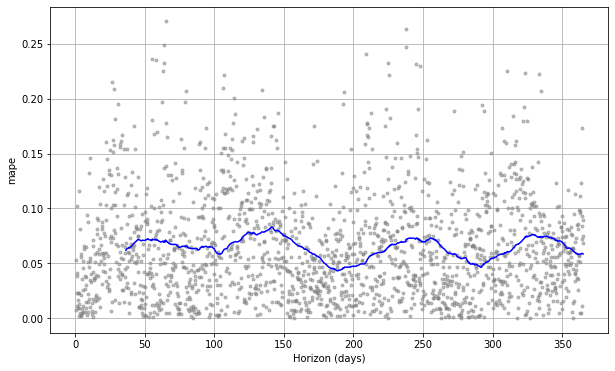

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric='mape')

# Prophet Trend Non-Stationary

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YoutubeLI/master/dataset/amazon_revenue_profit.csv')

In [7]:
df['Quarter'] = pd.to_datetime(df['Quarter'])

In [8]:
df.head(5)

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [9]:
fig = px.line(df, x='Quarter', y='Revenue', title='Amazon Revenue')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [10]:
from fbprophet import Prophet

In [11]:
amazon_df = df[['Quarter', 'Revenue']].rename({'Quarter': 'ds', 'Revenue': 'y'}, axis='columns')

In [12]:
amazon_df.head(5)

,ds,y
0,2020-03-31,75452
1,2019-12-31,87437
2,2019-09-30,69981
3,2019-06-30,63404
4,2019-03-31,59700


In [13]:
train=amazon_df[(amazon_df['ds'] >= '2005-03-31') & (amazon_df['ds'] <= '2019-03-31')]
test=amazon_df[amazon_df['ds'] > '2019-03-31']


In [14]:
m = Prophet(interval_width=0.95)

In [15]:
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
future = m.make_future_dataframe(periods=4, freq='Q')
future.tail()

,ds
56,2019-03-31
57,2019-06-30
58,2019-09-30
59,2019-12-31
60,2020-03-31


In [18]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2019-03-31,61089.496722,57043.910215,65170.300700
57,2019-06-30,63195.117248,59141.779459,67219.509720
58,2019-09-30,66153.769201,62222.660137,70448.443300
59,2019-12-31,74249.538212,70376.913564,78302.024437
60,2020-03-31,70663.367647,66639.698380,74860.208457


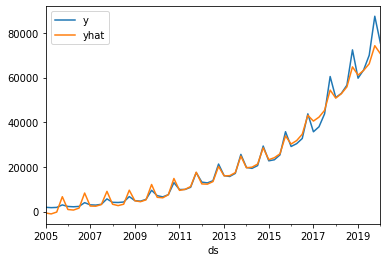

In [20]:
pd.concat([amazon_df.set_index('ds')['y'], forecast.set_index('ds')['yhat']], axis=1).plot()

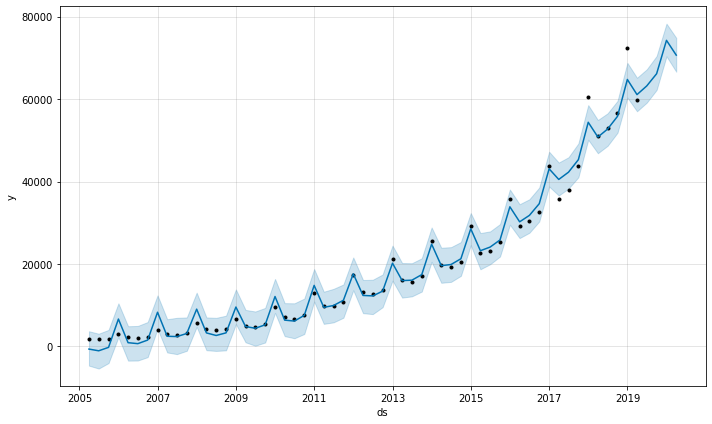

In [21]:
fig1 = m.plot(forecast)

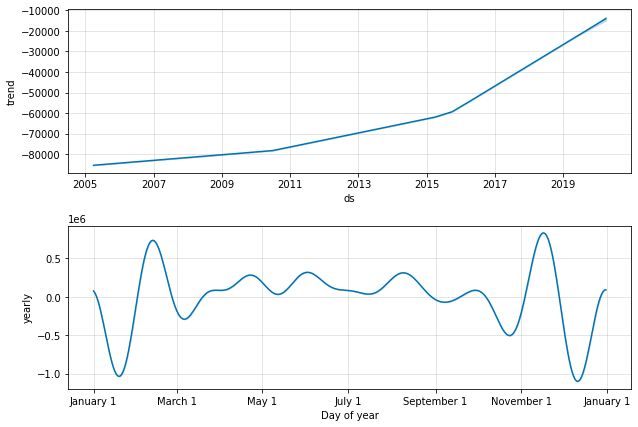

In [22]:
fig2 = m.plot_components(forecast)

In [23]:
holiday_sale = pd.DataFrame({
    'holiday': 'dec_jan_sale',
    'ds': pd.to_datetime(['2019-12-31','2018-12-31',
                          '2017-12-31','2016-12-31',
                          '2015-12-31','2014-12-31',
                          '2013-12-31','2012-12-31',
                          '2011-12-31','2010-12-31',
                          '2009-12-31','2008-12-31',
                          '2007-12-31','2006-12-31',
                          '2005-12-31']),
    'lower_window': 0,
    'upper_window': 1,
})

In [24]:
m2 = Prophet(interval_width=0.95, seasonality_mode='multiplicative', holidays=holiday_sale)

In [25]:
m2.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
forecast1 = m2.predict(future)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2019-03-31,60098.589527,58296.531388,61829.618343
57,2019-06-30,62627.734827,60817.951511,64413.290076
58,2019-09-30,67792.982748,65982.058755,69522.701327
59,2019-12-31,89317.926197,87413.056012,91236.100443
60,2020-03-31,66836.358707,64786.168909,68889.358281


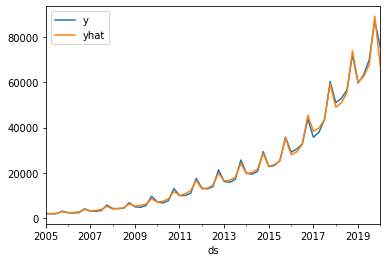

In [27]:
pd.concat([amazon_df.set_index('ds')['y'], forecast1.set_index('ds')['yhat']], axis=1).plot()

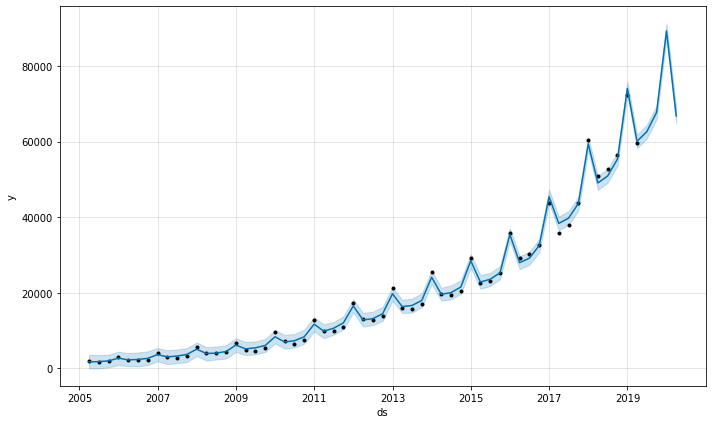

In [29]:
fig1 = m2.plot(forecast1)

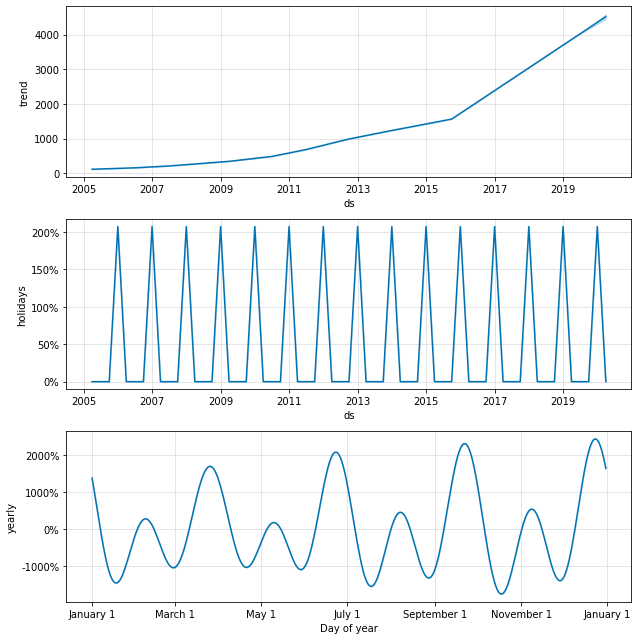

In [30]:
fig2 = m2.plot_components(forecast1)

# Multiple Time Series using Prophet

In [ ]:
!pip install download